In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
import keras
import re

In [ ]:
# dataset
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.label.unique()

array([0, 1])

In [ ]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

<Axes: ylabel='label'>

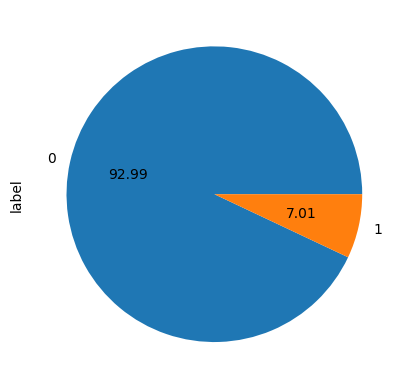

In [ ]:
# Racist/Sexiest 7% Tweets
df.label.value_counts().plot.pie(autopct="%.2f")

In [ ]:
df.tweet[:2]

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
Name: tweet, dtype: object

In [ ]:
# Lowercase
df.tweet=df.tweet.str.lower()

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
eng_stopw=list(set(stopwords.words("english")))

In [ ]:
eng_stopw[:5]

["that'll", 'shan', 'isn', 'because', 'will']

In [ ]:
# remove stopwords
def stop_words_removal(text):
  words=text.split(" ")
  non_stop_words=[word for word in words if word not in eng_stopw]
  return " ".join(non_stop_words)

In [ ]:
df.tweet=df.tweet.apply(lambda x : stop_words_removal(x))

In [ ]:
df.tweet[:2]

0     @user father dysfunctional selfish drags kids...
1    @user @user thanks #lyft credit can't use caus...
Name: tweet, dtype: object

In [ ]:
df.tweet=df.tweet.apply(lambda x : re.sub("[^a-zA-Z0-9\s]","",x))

In [ ]:
df.tweet[:2]

0     user father dysfunctional selfish drags kids ...
1    user user thanks lyft credit cant use cause of...
Name: tweet, dtype: object

In [ ]:
# converting text to sequences for modeling
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
token=Tokenizer(num_words=2000)

In [ ]:
token.fit_on_texts(df.tweet)

In [ ]:
token.word_counts

OrderedDict([('user', 17495),
             ('father', 199),
             ('dysfunctional', 1),
             ('selfish', 10),
             ('drags', 4),
             ('kids', 202),
             ('dysfunction', 3),
             ('run', 107),
             ('thanks', 304),
             ('lyft', 5),
             ('credit', 15),
             ('cant', 813),
             ('use', 115),
             ('cause', 73),
             ('offer', 27),
             ('wheelchair', 3),
             ('vans', 2),
             ('pdx', 3),
             ('disapointed', 1),
             ('getthanked', 2),
             ('bihday', 853),
             ('majesty', 10),
             ('model', 373),
             ('love', 2725),
             ('u', 1143),
             ('take', 621),
             ('time', 1124),
             ('ur', 454),
             ('\x85', 399),
             ('factsguide', 12),
             ('society', 24),
             ('motivation', 175),
             ('22', 16),
             ('huge', 44),
            

In [ ]:
X=token.texts_to_sequences(df.tweet)

In [ ]:
# pading sequences for uniformity in attributes or features
X=pad_sequences(X)

In [ ]:
X.shape

(31962, 20)

In [ ]:
word_idx=token.word_index

In [ ]:
# model Building
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,SpatialDropout1D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.activations import relu,softmax

In [ ]:
model = Sequential()
model.add(Embedding(2000,128,input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196,dropout=0.2))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['acc'])

In [ ]:
Y=df.label

In [ ]:
Y[:2]

0    0
1    0
Name: label, dtype: int64

In [ ]:
y=pd.get_dummies(df.label)

In [ ]:
y[:2]

,0,1
0,1,0
1,1,0


In [ ]:
hist1=model.fit(X,y,batch_size=128,epochs=3,validation_split=0.2)

Epoch 1/3
200/200 [==============================] - 34s 151ms/step - loss: 0.2051 - acc: 0.9367 - val_loss: 0.1412 - val_acc: 0.9510
Epoch 2/3
200/200 [==============================] - 30s 149ms/step - loss: 0.1234 - acc: 0.9558 - val_loss: 0.1365 - val_acc: 0.9520
Epoch 3/3
200/200 [==============================] - 30s 149ms/step - loss: 0.1100 - acc: 0.9604 - val_loss: 0.1366 - val_acc: 0.9515


In [ ]:
# Prediction for test dataset using same train tokenizer
test=pd.read_csv("test.csv")

In [ ]:
test.tweet=test.tweet.str.lower()

In [ ]:
test.tweet=test.tweet.apply(lambda x: stop_words_removal(x))

In [ ]:
test.tweet=test.tweet.apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

In [ ]:
X_test=token.texts_to_sequences(test.tweet)

In [ ]:
X_test=pad_sequences(X_test,maxlen=X.shape[1])

In [ ]:
X_test.shape

(17197, 20)

In [ ]:
y_pred=model.predict(X_test)

538/538 [==============================] - 11s 20ms/step


In [ ]:
y_pred[:2]

array([[0.9495872 , 0.05041275],
       [0.838885  , 0.16111504]], dtype=float32)

In [ ]:
y_p=np.argmax(y_pred[1:2])

In [ ]:
test['label']=[np.argmax(y_pred[i]) for i in range(0, len(y_pred))]

In [ ]:
test[:2]

,id,tweet,label
0,31963,studiolife aislife requires passion dedication...,0
1,31964,user white supremacists want everyone see new...,0


In [ ]:
test.head()

,id,tweet,label
0,31963,studiolife aislife requires passion dedication...,0
1,31964,user white supremacists want everyone see new...,0
2,31965,safe ways heal acne altwaystoheal healthy ...,0
3,31966,hp cursed child book reservations already yes ...,0
4,31967,3rd bihday amazing hilarious nephew eli ahmi...,0


In [ ]:
test.tail()

,id,tweet,label
17192,49155,thought factory leftright polarisation trump u...,1
17193,49156,feeling like mermaid hairflip neverready form...,0
17194,49157,hillary campaigned today ohioomg amp used word...,0
17195,49158,happy work conference right mindset leads cult...,0
17196,49159,song so glad free download shoegaze newmusi...,0


<Axes: ylabel='label'>

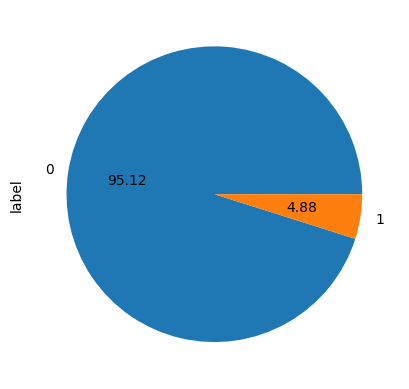

In [ ]:
test['label'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
# Prediction of test dataset by redefining tokenizer for test dataset
test=pd.read_csv("test.csv")

In [ ]:
test.tweet=test.tweet.str.lower()

In [ ]:
test.tweet=test.tweet.apply(lambda x: stop_words_removal(x))

In [ ]:
test.tweet=test.tweet.apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

In [ ]:
token.fit_on_texts(test.tweet)

In [ ]:
X_test=token.texts_to_sequences(test.tweet)

In [ ]:
X_test=pad_sequences(X_test,maxlen=X.shape[1])

In [ ]:
X_test.shape

(17197, 20)

In [ ]:
y_pred=model.predict(X_test)

538/538 [==============================] - 10s 19ms/step


In [ ]:
y_pred[:2]

array([[9.992702e-01, 7.297011e-04],
       [9.559595e-01, 4.404041e-02]], dtype=float32)

In [ ]:
y_p=np.argmax(y_pred[1:2])

In [ ]:
test['label']=[np.argmax(y_pred[i]) for i in range(0, len(y_pred))]

In [ ]:
test[:2]

,id,tweet,label
0,31963,studiolife aislife requires passion dedication...,0
1,31964,user white supremacists want everyone see new...,0


In [ ]:
test.head()

,id,tweet,label
0,31963,studiolife aislife requires passion dedication...,0
1,31964,user white supremacists want everyone see new...,0
2,31965,safe ways heal acne altwaystoheal healthy ...,0
3,31966,hp cursed child book reservations already yes ...,0
4,31967,3rd bihday amazing hilarious nephew eli ahmi...,0


In [ ]:
test.tail()

,id,tweet,label
17192,49155,thought factory leftright polarisation trump u...,0
17193,49156,feeling like mermaid hairflip neverready form...,0
17194,49157,hillary campaigned today ohioomg amp used word...,0
17195,49158,happy work conference right mindset leads cult...,0
17196,49159,song so glad free download shoegaze newmusi...,0


<Axes: ylabel='label'>

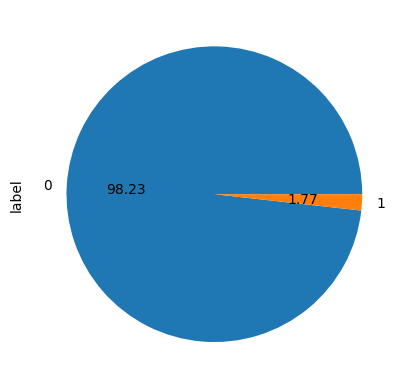

In [ ]:
test['label'].value_counts().plot.pie(autopct='%.2f')